In [1]:
ls /eos/cms/store/group/phys_pps/Phase2/Delphes/PU200/FPMC_WW_14TeV_a0w_0E0_aCw_0E0_noHADR_pt0_WWhadDecays_Delphes_PU200/FPMC_WW_14TeV_a0w_0E0_aCw_0E0_noHADR_pt0_9_WWhadDecays_Delphes_PU200.root

/eos/cms/store/group/phys_pps/Phase2/Delphes/PU200/FPMC_WW_14TeV_a0w_0E0_aCw_0E0_noHADR_pt0_WWhadDecays_Delphes_PU200/FPMC_WW_14TeV_a0w_0E0_aCw_0E0_noHADR_pt0_9_WWhadDecays_Delphes_PU200.root


In [2]:
import uproot4 #trocar o pt0_9
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
path='/eos/cms/store/group/phys_pps/Phase2/Delphes/PU200/FPMC_WW_14TeV_a0w_0E0_aCw_0E0_noHADR_pt0_WWhadDecays_Delphes_PU200/'
name='FPMC_WW_14TeV_a0w_0E0_aCw_0E0_noHADR_pt0_9_WWhadDecays_Delphes_PU200.root'


file=path+name
root=uproot4.open(file)

In [4]:
root.keys()

['ProcessID0;1', 'Delphes;1']

In [5]:
tree=root['Delphes']
root['Delphes']
#tree.keys()

<TTree 'Delphes' (58 branches) at 0x7f602cc4d160>

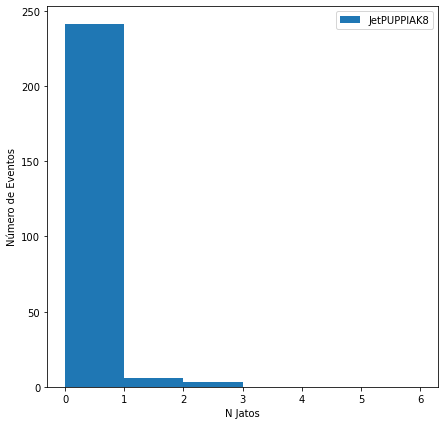

In [6]:
JetPUPPIAK8=tree['JetPUPPIAK8_size'].array()
f,ax = plt.subplots(figsize=(7,7))
plt.hist(JetPUPPIAK8, label='JetPUPPIAK8', bins=6, range=(0,6),alpha=1)
ax.legend(); 
ax.set(xlabel='N Jatos', ylabel='Número de Eventos')
plt.show()

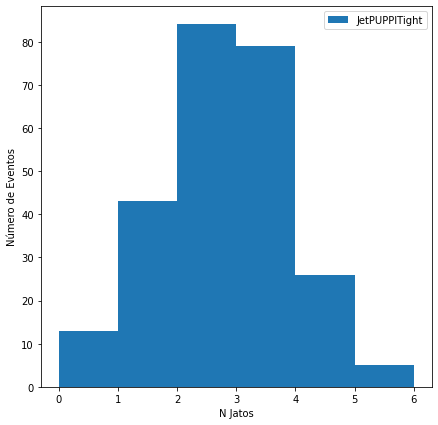

In [7]:
JetPUPPITight=tree['JetPUPPITight_size'].array()
f,ax = plt.subplots(figsize=(7,7))
plt.hist(JetPUPPITight, label='JetPUPPITight', bins=6, range=(0,6),alpha=1)
ax.legend(); 
ax.set(xlabel='N Jatos', ylabel='Número de Eventos')
plt.show()

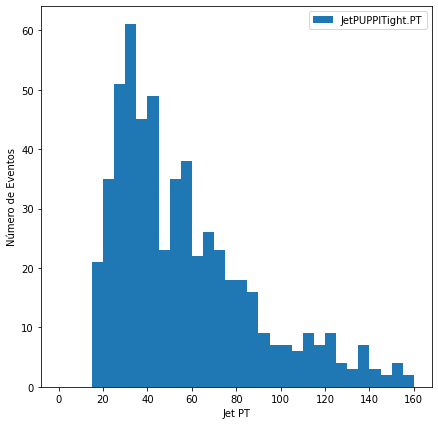

In [8]:
#PT:

JetPUPPITight_PT=tree['JetPUPPITight.PT'].array()
f,ax = plt.subplots(figsize=(7,7))
plt.hist(ak.flatten(JetPUPPITight_PT), bins=32, range=(0, 160),label='JetPUPPITight.PT',alpha=1)
ax.legend(); 
ax.set(xlabel='Jet PT', ylabel='Número de Eventos')
plt.show()


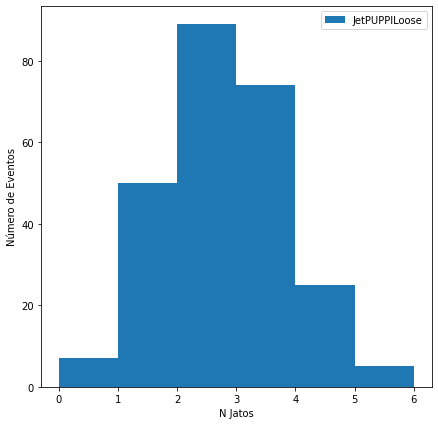

In [9]:
JetPUPPILoose=tree['JetPUPPILoose_size'].array()
f,ax = plt.subplots(figsize=(7,7))
plt.hist(JetPUPPILoose, label='JetPUPPILoose', bins=6, range=(0,6),alpha=1)
ax.legend(); 
ax.set(xlabel='N Jatos', ylabel='Número de Eventos')
plt.show()

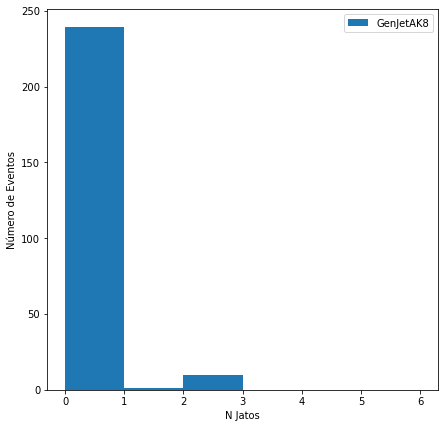

In [10]:
GenJetAK8=tree['GenJetAK8_size'].array()
f,ax = plt.subplots(figsize=(7,7))
plt.hist(GenJetAK8, label='GenJetAK8', bins=6, range=(0,6),alpha=1)
ax.legend(); 
ax.set(xlabel='N Jatos', ylabel='Número de Eventos')
plt.show()

In [11]:
Vertex_Size=tree['Vertex_size'].array()
n_events=len(Vertex_Size)
print(Vertex_Size)
print(n_events)
print(np.sum(Vertex_Size))

[192, 212, 195, 189, 198, 204, 178, 214, ... 197, 197, 170, 196, 195, 185, 193, 222]
250
50127


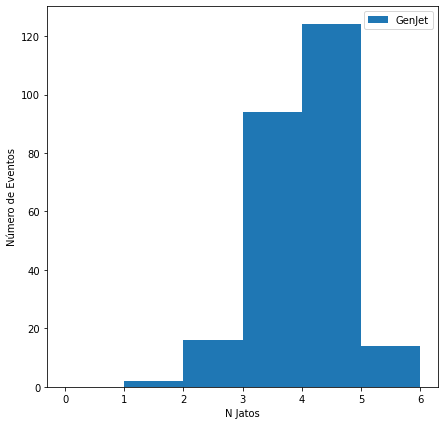

882


In [12]:
GenJet=tree['GenJet_size'].array()
f,ax = plt.subplots(figsize=(7,7))
plt.hist(GenJet, label='GenJet', bins=6, range=(0,6),alpha=1)
ax.legend(); 
ax.set(xlabel='N Jatos', ylabel='Número de Eventos')
plt.show()
print(np.sum(GenJet))


In [13]:
#GenJet

GenJet_PT=tree['GenJet.PT'].array() 
GenJet_Eta=tree['GenJet.Eta'].array() 
GenJet_Phi=tree['GenJet.Phi'].array() 
GenJet_Mass=tree['GenJet.Mass'].array()
GenJet_T=tree['GenJet.T'].array()

#JetPUPPITight

JetPUPPITight_PT=tree['JetPUPPITight.PT'].array()
JetPUPPITight_Eta=tree['JetPUPPITight.Eta'].array()
JetPUPPITight_Phi=tree['JetPUPPITight.Phi'].array()
JetPUPPITight_Mass=tree['JetPUPPITight.Mass'].array()
JetPUPPITight_T=tree['JetPUPPITight.T'].array()


# Taking all pair of jets and computing the mass:

In [14]:
AllPairs_Mass=[]
AllPairs_Sum=[]

PUPPITight_Pairs_Mass=[]
PUPPITight_Pairs_Sum=[]

#Counting the number of pairs:
n_pairs=0
n_pairs_PUPPI=0

#GenJets:

for _ev in range(len(GenJet)): #if size(GenJet[_ev])>3 jatos #JetPUPPITight && Protons no PPS
    
    items_Mass = GenJet_Mass[_ev]
    GenJet_pairs_Mass=[(_ev,items_Mass[i],items_Mass[j]) for i in range(len(items_Mass)) for j in range(i+1, len(items_Mass))]
    AllPairs_Mass.append(GenJet_pairs_Mass)
    
    
for _ev in range(len(AllPairs_Mass)):
    n_pairs=n_pairs+len(AllPairs_Mass[_ev])

for _ev in range(len(AllPairs_Mass)):
    for i in range(len(AllPairs_Mass[_ev])):
        AllPairs_Sum.append(AllPairs_Mass[_ev][i][1]+AllPairs_Mass[_ev][i][2])


#JetPUPPI:
        
for _ev in range(len(JetPUPPITight)):
    
    items_Mass_PUPPI = JetPUPPITight_Mass[_ev]
    _Puppi_pairs_Mass=[(_ev,items_Mass_PUPPI[i],items_Mass_PUPPI[j]) for i in range(len(items_Mass_PUPPI)) for j in range(i+1, len(items_Mass_PUPPI))]
    PUPPITight_Pairs_Mass.append(_Puppi_pairs_Mass)
    
for _ev in range(len(PUPPITight_Pairs_Mass)):        
    n_pairs_PUPPI=n_pairs_PUPPI+len(PUPPITight_Pairs_Mass[_ev])
    
for _ev in range(len(PUPPITight_Pairs_Mass)):
    for i in range(len(PUPPITight_Pairs_Mass[_ev])):
        PUPPITight_Pairs_Sum.append(PUPPITight_Pairs_Mass[_ev][i][1]+PUPPITight_Pairs_Mass[_ev][i][2])

        
print('The number of pairs in GenJet is:',len(AllPairs_Sum))

print('The number of pairs in JetPUPPITight is:',len(PUPPITight_Pairs_Sum))

The number of pairs in GenJet is: 1182
The number of pairs in JetPUPPITight is: 532


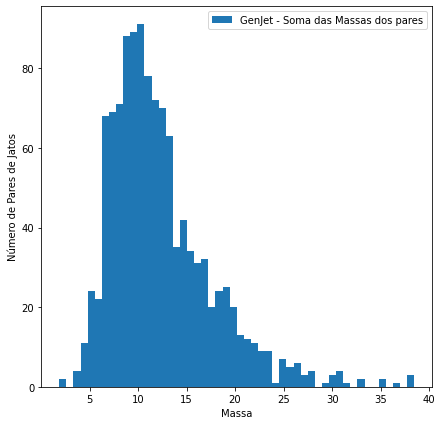

In [15]:
f,ax = plt.subplots(figsize=(7,7))
plt.hist(AllPairs_Sum, label='GenJet - Soma das Massas dos pares', bins=50, alpha=1)
ax.legend(); 
ax.set(xlabel='Massa', ylabel='Número de Pares de Jatos')
plt.show()

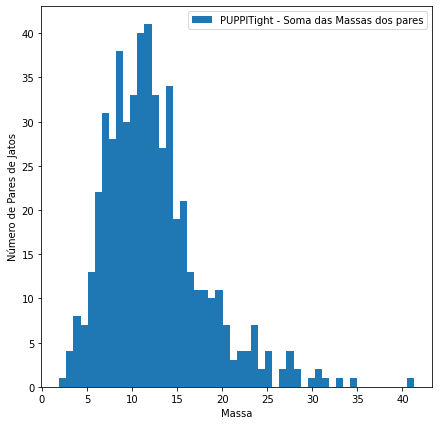

In [16]:
f,ax = plt.subplots(figsize=(7,7))
plt.hist(PUPPITight_Pairs_Sum, label='PUPPITight - Soma das Massas dos pares', bins=50, alpha=1)
ax.legend(); 
ax.set(xlabel='Massa', ylabel='Número de Pares de Jatos')
plt.show()

In [17]:
convert_nanosec=1e9
zpos=23400
tvertex=40e-12 # time resolution for main vertex:
tpps=30e-12 # time resolution for proton in PPS:

trP=(convert_nanosec)*tpps
trM=(convert_nanosec)*tvertex

VertexT_CMS=(convert_nanosec)*tree['Vertex.T'].array() # converted to nanosec

GenJet_Vz=tree['Vertex.Z'].array()
GenJet_VT=VertexT_CMS+np.random.normal(0,trM,len(VertexT_CMS)) 
 
JetPUPPITight_Vz=tree['Vertex.Z'].array() 
JetPUPPITight_VT=VertexT_CMS+np.random.normal(0,trM,len(VertexT_CMS)) 

# single beam energy:
ebeam=7000.
# collision energy:
ecms=2*ebeam
# xi acceptance from Table 4 on page 40 of https://cds.cern.ch/record/2750358/files/NOTE2020_008.pdf:
_mode='vertical'
xi_min = 0.0147 # using the 234m station
xi_max = 0.196 # using the 196m station
pz_min = (1-xi_max)*ebeam
pz_max = (1-xi_min)*ebeam
# print limiting xi and pz:
pz_min1 =(1-1.08*xi_max)*ebeam
pz_max1 =(1-0.92*xi_min)*ebeam
print('For xi range of (%2.3f,%2.3f) proton pz is in range from %2.2f to %2.2f GeV'%(xi_min,xi_max,pz_min,pz_max))
print(pz_min1)
print(pz_max1)

For xi range of (0.015,0.196) proton pz is in range from 5628.00 to 6897.10 GeV
5518.24
6905.332


In [18]:
protons = tree.arrays(['GenProton.Pz','GenProton.Z','GenProton.IsPU','GenProton.T'],  cut="(abs(GenProton.Pz)>%g) & (abs(GenProton.Pz)<%g)"%(pz_min,pz_max))
print('The total number of events is:', len(protons))

The total number of events is: 250


In [19]:
zpos=23400

# time resolution for main vertex:
tvertex=40e-12
# time resolution for proton in PPS:
tpps=30e-12

convert_nanosec=1e9
trP=(convert_nanosec)*tpps
trM=(convert_nanosec)*tvertex

# setting initial vars:
N_Protons=np.zeros(len(protons)).astype(int) # number of protons in each event that pass the PPS criteria
GenProton_pz=protons['GenProton.Pz']
GenProton_vz=protons['GenProton.Z']
GenProton_ispu=protons['GenProton.IsPU']
GenProton_t=(convert_nanosec)*protons['GenProton.T'] # convert timing to nanosec

# setting vars for elements passing criteria of pz_min and pz_max of protons:
PassPz_Proton_pz=[]
PassPz_Proton_vz=[]
PassPz_Proton_ispu=[]
PassPz_Proton_t=[]
PassPz_Proton_tsmeared=[]
PassPz_Proton_xi=[]
PassPz_Proton_PU=[]

# store sign of proton:
sig=[]

In [20]:
# loop over events in GenProton_pz branch:
for i in tqdm(range(len(GenProton_pz))):
    _pz=GenProton_pz[i]
    _xi=1-np.abs(_pz)/ebeam
    # smear with 2% uncertainty:
    _uncert=0.02
    _xi_smear=_xi*(1+np.random.normal(0,_uncert,len(_xi)))
    _pz_smear=ebeam*(1-_xi_smear)
    _t=np.zeros(len(_pz))
    
    # converting light speed from m/s to cm/ns:
    convert_m_to_cm=1e2
    c=3e8 # why not 299 792 458 m/s ?
    lightspeed=c*convert_m_to_cm/convert_nanosec
    
    # loop over proton pz and store timing:
    for k in range(len(_pz)):
        if _pz[k]>0:
            _t[k]=(GenProton_t[i][k]+(zpos-GenProton_vz[i][k])/lightspeed)
        else: 
            _t[k]=(GenProton_t[i][k]+(zpos+GenProton_vz[i][k])/lightspeed)

    # smear timing around PPS resolution:
    _tsmear=_t+np.random.normal(0,trP,len(_t))
    
    # a counter for protons:
    _Npr=0

    # PassPz :: loop over proton pz and store passing events within smearing:
    # [i] == event
    # [k] == proton in event
    for k in range(len(_pz)):
        if (abs(_pz_smear[k])>pz_min) and (abs(_pz_smear[k])<pz_max):
            sig.append(np.sign(_pz[k])) #Storing the Pz sign of each proton
            PassPz_Proton_pz.append(_pz_smear[k])
            PassPz_Proton_xi.append(_xi_smear[k])
            PassPz_Proton_vz.append(GenProton_vz[i][k])
            PassPz_Proton_PU.append(GenProton_ispu[i][k])
            PassPz_Proton_t.append(_t[k])
            PassPz_Proton_tsmeared.append(_tsmear[k])
            _Npr=_Npr+1
    
    # count number of protons passing PPS criteria after the smearing
    N_Protons[i]=_Npr

100%|██████████| 250/250 [00:03<00:00, 72.39it/s]


The total number of protons that passed the criteria is 2588


(array([ 2.,  4., 18., 24., 49., 70., 26., 34., 12., 10.]),
 array([ 1. ,  2.7,  4.4,  6.1,  7.8,  9.5, 11.2, 12.9, 14.6, 16.3, 18. ]),
 <BarContainer object of 10 artists>)

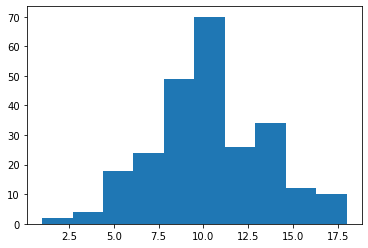

In [21]:
print('The total number of protons that passed the criteria is', np.sum(N_Protons))
plt.hist(N_Protons, bins=10, range=(1,18))
#for i in range(len(N_Protons)):
 #   print(N_Protons[i])

Sorting Protons by Direction

In [22]:
# prep store for proton sign and pairs:
ProtonsNeg = np.zeros(n_events)
ProtonsPos = np.zeros(n_events)
N_Pairs = np.zeros(n_events) # possible combinations for 2 protons on both sectors
###nprot = np.zeros(n_events) # can be removed?

# simple counter:
_count=0

# loop over protons that passed the PassPz criteria:
# ev == event (first index)
# nprotons == secondary index to loop over protons in event (ev)
for ev,_nprotons in tqdm(enumerate(N_Protons)):
    # check sign:
    for i in range(_nprotons):
        if (sig[_count+i]>0):
            ProtonsPos[ev] = ProtonsPos[ev]+1
        else:
            ProtonsNeg[ev] = ProtonsNeg[ev]+1
        N_Pairs = ProtonsPos*ProtonsNeg
    _count = _count + _nprotons

250it [00:00, 42150.42it/s]


In [23]:
#print(ProtonsPos)
#print(ProtonsNeg)
#print(np.sum(ProtonsPos)+np.sum(ProtonsNeg))

# New 2-Jet mass distribution after PPS cut:

In [24]:
AllPairs_Mass=[]
AllPairs_Sum=[]

PUPPITight_Pairs_Mass=[]
PUPPITight_Pairs_Sum=[]

#Counting the number of pairs:
n_pairs=0
n_pairs_PUPPI=0

#GenJets:

for _ev in range(len(GenJet)): 
    if (GenJet[_ev]>3) and  ProtonsPos[_ev]>0 and ProtonsNeg[_ev]>0:
        items_Mass = GenJet_Mass[_ev]
        GenJet_pairs_Mass=[(_ev,items_Mass[i],items_Mass[j]) for i in range(len(items_Mass)) for j in range(i+1, len(items_Mass))]
        AllPairs_Mass.append(GenJet_pairs_Mass)
    
    
for _ev in range(len(AllPairs_Mass)):
    n_pairs=n_pairs+len(AllPairs_Mass[_ev])

for _ev in range(len(AllPairs_Mass)):
    for i in range(len(AllPairs_Mass[_ev])):
        AllPairs_Sum.append(AllPairs_Mass[_ev][i][1]+AllPairs_Mass[_ev][i][2])


#JetPUPPI:
        
for _ev in range(len(JetPUPPITight)):
    if (JetPUPPITight[_ev]>3) and  ProtonsPos[_ev]>0 and ProtonsNeg[_ev]>0:
        items_Mass_PUPPI = JetPUPPITight_Mass[_ev]
        _Puppi_pairs_Mass=[(_ev,items_Mass_PUPPI[i],items_Mass_PUPPI[j]) for i in range(len(items_Mass_PUPPI)) for j in range(i+1, len(items_Mass_PUPPI))]
        PUPPITight_Pairs_Mass.append(_Puppi_pairs_Mass)
    
for _ev in range(len(PUPPITight_Pairs_Mass)):        
    n_pairs_PUPPI=n_pairs_PUPPI+len(PUPPITight_Pairs_Mass[_ev])
    
for _ev in range(len(PUPPITight_Pairs_Mass)):
    for i in range(len(PUPPITight_Pairs_Mass[_ev])):
        PUPPITight_Pairs_Sum.append(PUPPITight_Pairs_Mass[_ev][i][1]+PUPPITight_Pairs_Mass[_ev][i][2])

        




print('The number of pairs in GenJet after PPS cut is:',len(AllPairs_Sum))

print('The number of pairs in JetPUPPITight after PPS is:',len(PUPPITight_Pairs_Sum))

The number of pairs in GenJet after PPS cut is: 884
The number of pairs in JetPUPPITight after PPS is: 211


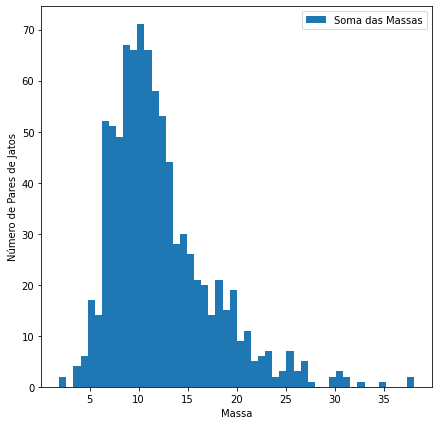

In [25]:
f,ax = plt.subplots(figsize=(7,7))
plt.hist(AllPairs_Sum, label='Soma das Massas', bins=50, alpha=1)
ax.legend(); 
ax.set(xlabel='Massa', ylabel='Número de Pares de Jatos')
plt.show()

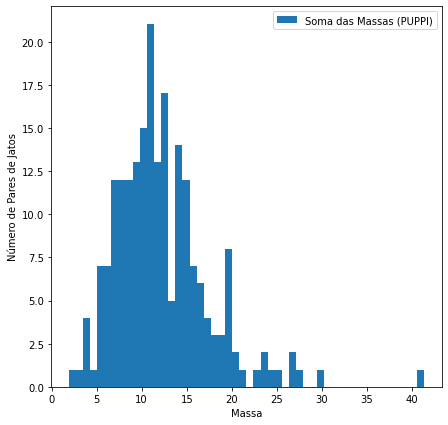

In [26]:
f,ax = plt.subplots(figsize=(7,7))
plt.hist(PUPPITight_Pairs_Sum, label='Soma das Massas (PUPPI)', bins=50, alpha=1)
ax.legend(); 
ax.set(xlabel='Massa', ylabel='Número de Pares de Jatos')
plt.show()

In [27]:
#Setting the variables for J1 and J2:

PT_J1=0; PT_J2=0; 
p_J1=0; p_J2=0;
Eta_J1=0; Eta_J2=0;
m_J1=0; m_J2=0;

#Setting the variables for W

W_mass=80 #PDG site
W_mass_JJ=0

diff_aux=9999
difference=0
min_diff=[] #to store de minimum difference on each event
count=0
count2=0

for _ev in range(len(GenJet)): #if size(GenJet[_ev])>3 jatos #JetPUPPITight && Protons no PPS
    
    items_PT = GenJet_PT[_ev]
    Jet_pairs_PT=[(_ev,items_PT[i],items_PT[j]) for i in range(len(items_PT)) for j in range(i+1, len(items_PT))]
    
    items_Eta = GenJet_Eta[_ev]
    Jet_pairs_Eta = [(_ev,items_Eta[i],items_Eta[j]) for i in range(len(items_Eta)) for j in range(i+1, len(items_Eta))]
    
    items_Mass = GenJet_Mass[_ev]
    Jet_pairs_Mass = [(_ev,items_Mass[i],items_Mass[j]) for i in range(len(items_Mass)) for j in range(i+1, len(items_Mass))]
    
    #print(Jet_pairs_PT[0][1],Jet_pairs_PT[0][2])
    #print(Jet_pairs_Eta)
    #print(Jet_pairs_Mass)
            
    for _pair in range(len(Jet_pairs_PT)): #len(Jet_pairs_PT)=len(Jet_pairs_Eta)=len(Jet_pairs_Mass)
        
        #Taking the PT of the pair:
        
        PT_J1=GenJet_PT[_pair][1]
        PT_J2=GenJet_PT[_pair][2]
        
        #Calculating the Momenta 'p' for the pair
        
        p_J1=PT_J1*np.cosh(Eta_J1) 
        p_J2=PT_J2*np.cosh(Eta_J2) 
                       
        #Taking the mass of the pair
        
        m_J1=Jet_pairs_Mass[_pair][1]
        m_J2=Jet_pairs_Mass[_pair][2]
                     
        #Calculating Boson W Mass with Jet's variables
        
        W_mass_JJ= m_J1**2 + m_J2**2 + (2*np.sqrt(p_J1**2+m_J1**2)) + (2*np.sqrt(p_J2**2+m_J2**2)) #-2*p_J1*p_J2*cos(theta_J1_J2)
        
        #Checking the difference
                
        difference=abs(W_mass_JJ-W_mass)
        #print(difference)
        count=count+1
        
        #Taking the 2 minimum difference in each event and building the Bosons variables:
        
        if (difference)<diff_aux:
            dif_aux=difference
            #Definir o TLoretz dos Ws com base no Jato que passou pra cada W
            #Fazer W 'primario' e W 'secundário' com relação às diferenças de massa
            #Guardar o difference
        elif (difference>min_diff_W1):
            count2=count2+1
            
    min_diff.append(dif_aux)


print(count) #Should return the number of pairs
print(len(min_diff)) #Should return the number of events
#print(min_diff)


1182
250


In [28]:
#Now that we have obtained at least two W for each event, we must match them with the protons.

W_lead=[]
W_sublead=[]

for _ev,_nw in tqdm(enumerate(All_W)):
    # reset W kinematics:
    _w1_pt=0; _w1_eta=0; _w1_phi=0; _w1_t=0; _w1_z=0
    _w2_pt=0; _w2_eta=0; _w2_phi=0; _w2_t=0; _w2_z=0

    for i in range(_nw):
        print(_ev,_w,W_pt[_ev][i],W_eta[_ev][i])
        # search for leading W:
        if W_pt[_ev][i]>_w1_pt:
            # store subleading W:
            _W2_pt = _W1_pt
            _W2_eta = _W1_eta
            _W2_phi = _W1_phi     
            # store leading W:
            _W1_pt = W_pt[_ev][i]
            _W1_eta = W_eta[_ev][i]
            _W1_phi = W_phi[_ev][i]
        elif W_pt[_ev][i]>_W_pt:
            # if last, store subleading muon:
            _W2_pt = W_pt[_ev][i]
            _W2_eta = W_eta[_ev][i]
            _W2_phi = W_phi[_ev][i]

    # Eta for all Electrons
    AllW_eta.append(_W_eta)
    AllW_eta.append(_W_eta)
    
    #Pt for all Electrons
    AllW_pt.append(_W_pt)
    AllW_pt.append(_W_pt)
    
    #Phi for all Electrons
    AllW_phi.append(_W1_phi)
    AllW_phi.append(_W2_phi)
    # We must check if the event is valid. It means that there must be WW and 2 PROTONS that pass the PPS criteria.
    if (_W1_pt!=0) and (_W2_pt!=0) and (ProtonsPos[_ev]!=0) and (ProtonsNeg[_ev]!=0):
        
        # save the leading and subleading W:
        W_Lead_pt.append(_W1_pt)
        W_SubL_pt.append(_W2_pt)
        
        ########### compute invariant mass of WW pair:
        W_SumET.append(_W1_pt*np.cosh(_W1_eta)+_W2_pt*np.cosh(_W2_eta)) # sumET = pt1*cosh(eta1) + pt2*cosh(eta2)
        _sumTPx = _W1_pt*np.cos(_W1_phi)+_W2_pt*np.cos(_W2_phi) # sumTPx = pt1*cos(phi1) + pt2*cos(phi2)
        _sumTPy = _W1_pt*np.sin(_W1_phi)+_W2_pt*np.sin(_W2_phi) # sumTPy = pt1*sin(phi1) + pt2*sin(phi2)
        W_SumPz.append(_W1_pt*np.sinh(_W1_eta)+_W2_pt*np.sinh(_W2_eta))  # sumTPz = pt1*sinh(eta1) + pt2*sinh(eta2)
        # building the WW pair:
        
        _di_WP = np.sqrt( _sumTPx**2 + _sumTPy**2 + W_SumPz[-1]**2 )
        #_mllt2 = (_mu1_pt*np.cosh(_mu1_eta)+_mu2_pt*np.cosh(_mu2_eta))**2 - _di_TMuonP**2  # - sumTPx**2 - sumTPy**2 - sumTPz**2
        _mWWt2 = W_SumET[-1]**2 - _di_WP**2
        # physics check:
        if(_mWWt2<0): _mWWt2=0
        W_mWW.append(np.sqrt(_mWWt2))
        #TMuon_yll[_ev]=_mu1_eta+_mu2_eta
        W_T.append(W_VT[_ev])
        W_z.append(W_Vz[_ev])
        # compute rapidity from last object appended ([-1])
        W_yll.append( 0.5*np.log( (W_SumET[-1] + W_SumPz[-1])/(W_SumET[-1] - W_SumPz[-1]) ) )
    else: #if not WW plus 2 protons:
        noW[_ev] = 1
    

NameError: name 'All_W' is not defined